# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime
import pytemperature
# not a standard library: pip install pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [116]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + 'c695b8706d2f4a9452e480866f415a34' + "&q="
pp = pprint.PrettyPrinter(indent=4)

# functionality
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
#     Build query URL 
    query_url = generic_weather_url + city
#     Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod'] != 200:
        print(f'City not found. Skipping...')
    else: #include in our dataset
#         pp.pprint(weather_json)
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(pytemperature.k2f(weather_json['main']['temp_max']))
        Wind_Speed.append(weather_json['wind']['speed'])     

Beginning Data Retrieval
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | atka
City not found. Skipping...
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | taperoa
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | mys shmidta
City not found.

Processing Record 179 of Set 1 | norman wells
Processing Record 180 of Set 1 | ballina
Processing Record 181 of Set 1 | nikel
Processing Record 182 of Set 1 | fortuna
Processing Record 183 of Set 1 | georgetown
Processing Record 184 of Set 1 | urucui
Processing Record 185 of Set 1 | rocha
Processing Record 186 of Set 1 | sao jose da coroa grande
Processing Record 187 of Set 1 | talnakh
Processing Record 188 of Set 1 | vangaindrano
Processing Record 189 of Set 1 | samarai
Processing Record 190 of Set 1 | katobu
Processing Record 191 of Set 1 | buchanan
Processing Record 192 of Set 1 | pundaguitan
Processing Record 193 of Set 1 | karatsu
Processing Record 194 of Set 1 | pechenga
Processing Record 195 of Set 1 | nador
Processing Record 196 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 197 of Set 1 | payakumbuh
Processing Record 198 of Set 1 | mercedes
Processing Record 199 of Set 1 | sabang
Processing Record 200 of Set 1 | saint-pierre
Processing Record 201 of Set 1 | geraldton
P

Processing Record 366 of Set 1 | dakar
Processing Record 367 of Set 1 | roebourne
Processing Record 368 of Set 1 | rawson
Processing Record 369 of Set 1 | bonavista
Processing Record 370 of Set 1 | svilajnac
Processing Record 371 of Set 1 | bako
Processing Record 372 of Set 1 | nipawin
Processing Record 373 of Set 1 | port shepstone
Processing Record 374 of Set 1 | pichayevo
Processing Record 375 of Set 1 | shugurovo
Processing Record 376 of Set 1 | taoudenni
Processing Record 377 of Set 1 | jesus carranza
Processing Record 378 of Set 1 | saldanha
Processing Record 379 of Set 1 | labuan
Processing Record 380 of Set 1 | dossor
Processing Record 381 of Set 1 | ewa beach
Processing Record 382 of Set 1 | maragogi
Processing Record 383 of Set 1 | bontang
Processing Record 384 of Set 1 | palu
Processing Record 385 of Set 1 | axim
Processing Record 386 of Set 1 | teknaf
Processing Record 387 of Set 1 | adilabad
Processing Record 388 of Set 1 | iskateley
Processing Record 389 of Set 1 | ahipar

In [105]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 9 columns):
City          530 non-null object
Cloudiness    530 non-null int64
Country       530 non-null object
Date          530 non-null int64
Humidity      530 non-null int64
Lat           530 non-null float64
Lng           530 non-null float64
Max Temp      530 non-null float64
Wind Speed    530 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 37.3+ KB


In [107]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,0,AR,1552510800,47,-54.81,-68.31,287.15,4.18
1,Palaia Fokaia,20,GR,1552513862,65,37.72,23.95,282.15,1.50
2,Albany,90,US,1552513889,36,42.65,-73.75,280.37,3.60
3,Methoni,20,GR,1552513845,81,36.82,21.70,284.26,2.10
4,Murchison,0,AU,1552512857,58,-36.62,145.22,287.59,2.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [108]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Cloudiness'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    

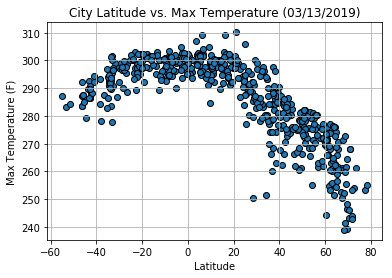

In [109]:
generic_plot('Lat','Max Temp')

#### Latitude vs. Humidity Plot

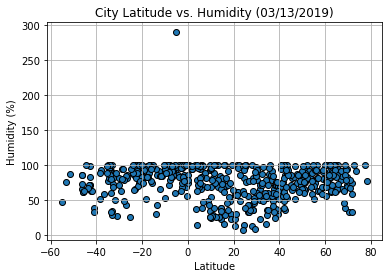

In [110]:
generic_plot('Lat','Humidity')

#### Latitude vs. Cloudiness Plot

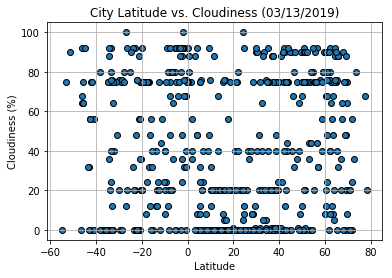

In [111]:
generic_plot('Lat','Cloudiness')

#### Latitude vs. Wind Speed Plot

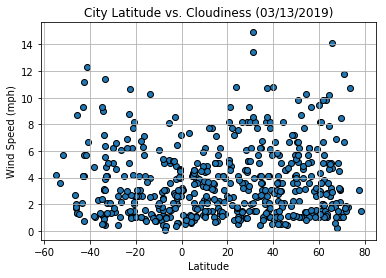

In [112]:
generic_plot('Lat','Wind Speed')